In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#import essential libraries.

In [2]:
shootings=pd.read_csv(r"C:\Users\singa tharun reddy\Desktop\Github projects\US police shooting analysis\fatal-police-shootings-data.csv")

In [3]:
shootings.head()#overview of data.

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
shootings.info()#checking datatype of all columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
shootings.shape#There are 5416 rows and 14 colums.

(5416, 14)

In [6]:
shootings.nunique()#It is evident that, id and name have many unique data.Hence they are non-essentail for current analysis.

id                         5416
name                       5206
date                       1844
manner_of_death               2
armed                        93
age                          77
gender                        2
race                          6
city                       2470
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

In [7]:
shootings.drop(["id","name"], axis=1, inplace=True)#droping non essential columns.

In [8]:
shootings.isna().sum()

date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [9]:
#Closely examine each column that has null values.
#1.Armed cloumn.
shootings.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'baton', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'machete and gun', 'tire iron',
 

In [10]:
#As we don't have much data, I am filling NAN values with other in Armed column.
shootings.armed.fillna(value="other", inplace=True)

In [11]:
shootings.isna().sum()

date                         0
manner_of_death              0
armed                        0
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [12]:
#2. Age 
shootings.age.unique()

array([53., 47., 23., 32., 39., 18., 22., 35., 34., 25., 31., 41., 30.,
       37., 28., 42., 36., 49., 71., 33., 29., 43., 24., 75., 68., 27.,
       48., 21., 67., 19., 54., 17., 56., 61., 45., 26., 40., 59., 38.,
       51., 74., 57., 46., 16., 50., 20., 77., nan, 58., 64., 52., 63.,
       44., 60., 66., 83., 72., 76., 62., 55., 69., 86., 15., 65.,  6.,
       12., 70., 80., 14., 82., 13., 73., 91., 79., 78., 84., 81., 89.])

In [13]:
shootings.age.describe()#we can see that age is predominatly between 27 and 46. 

count    5181.000000
mean       37.117931
std        13.116135
min         6.000000
25%        27.000000
50%        35.000000
75%        46.000000
max        91.000000
Name: age, dtype: float64

In [14]:
shootings.age.fillna(value=shootings.age.mean(), inplace=True)# Fillings the Nan value with mean of age.

In [15]:
#3.Race.
shootings.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [16]:
#As we don't have much data, I am filling NAN values as Unkown in race column.
shootings.race.fillna(value="Unkown", inplace=True)

In [17]:
#4.flee.
shootings.flee.unique()

array(['Not fleeing', 'Car', 'Foot', 'Other', nan], dtype=object)

In [18]:
shootings.flee.fillna(value="Other", inplace=True)

In [31]:
#5.gender.
shootings.gender.value_counts()

M    5176
F     238
Name: gender, dtype: int64

In [29]:
shootings.dropna(inplace=True)

In [30]:
shootings.isna().sum()

date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [32]:
shootings.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [33]:
shootings['date']=pd.to_datetime(shootings['date'], utc=False)

In [34]:
shootings.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [35]:
df=shootings

In [41]:
month= df.date.dt.month
month_shot=month.value_counts()
month_shot

3     550
1     531
2     495
5     486
4     470
7     439
6     439
12    421
8     418
10    411
11    392
9     362
Name: date, dtype: int64

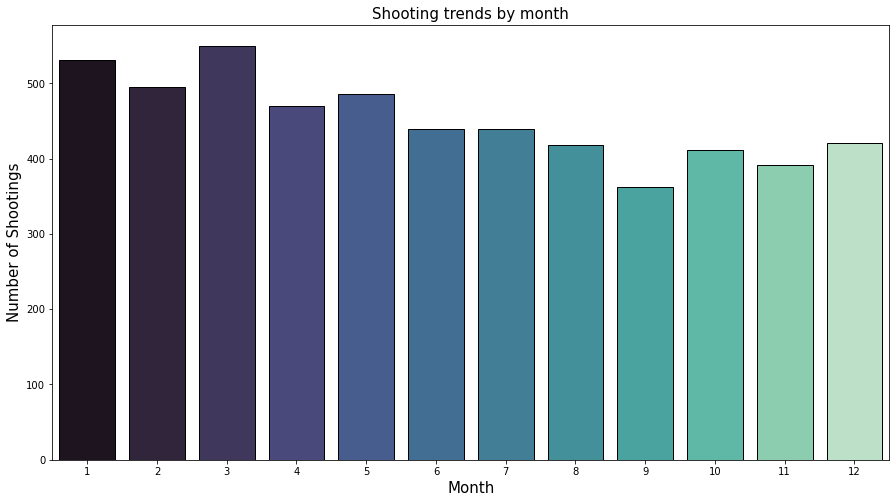

In [64]:
month= df.date.dt.month
month_shot=month.value_counts()

f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=month_shot.index,y=month_shot.values,palette="mako",edgecolor='black')
plt.ylabel("Number of Shootings", fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=15)
plt.title("Shooting trends by month",fontsize=15)
plt.show()

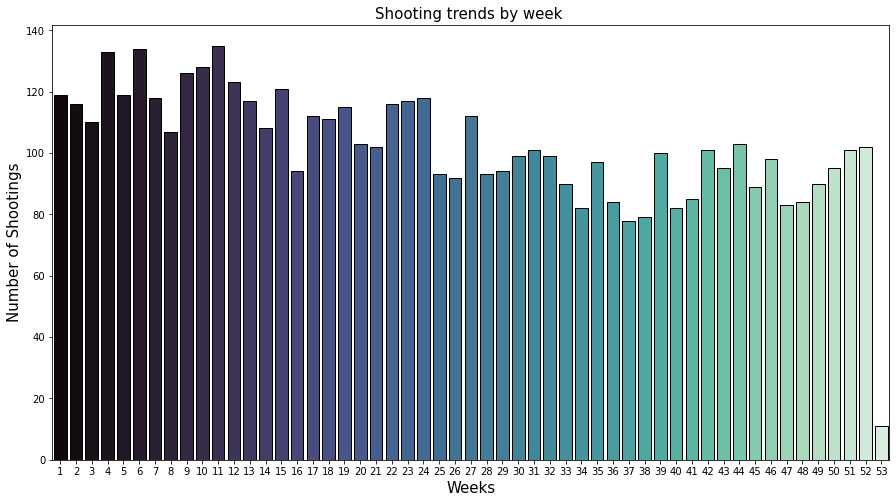

In [62]:
week= df.date.dt.week
week_shot=week.value_counts()

f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=week_shot.index,y=week_shot.values,palette="mako",edgecolor='black')
plt.ylabel("Number of Shootings", fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("Weeks", fontsize=15)
plt.title("Shooting trends by week ",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Manner of death')

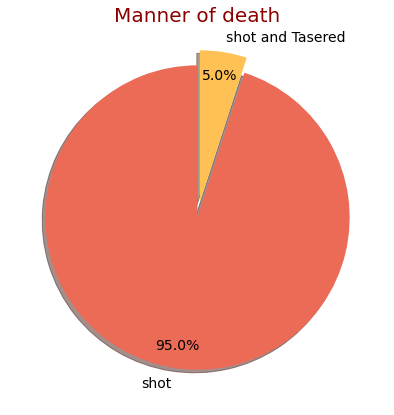

In [72]:
death=df.manner_of_death.value_counts()
labels= death.index  # x ticks
sizes= death.values
## Create Pie chart Plot ##
plt.figure(figsize = (7,7))
explode = [0,0.1]
colors = ['#EC6B56','#FFC154']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 14},pctdistance=0.85, startangle=90, colors=colors)
plt.title('Manner of death',color = 'darkRed',fontsize = 20)

Text(0.5, 1.0, 'Type of Fleeing')

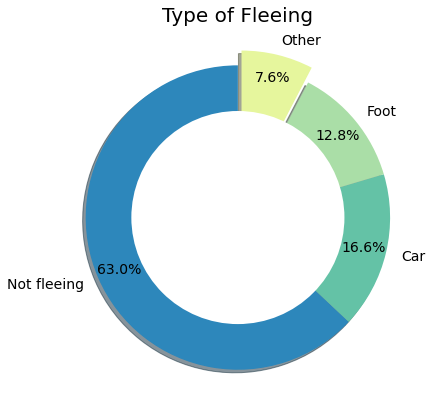

In [76]:
flee=df.flee.value_counts()
labels=flee.index  # x ticks
sizes= flee.values

## Create Pie chart Plot ##
plt.figure(figsize = (7,7))
explode = [0,0,0,0.1]
colors = ['#2D87BB','#64C2A6','#AADEA7', "#E6F69D"]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 14},pctdistance=0.85,startangle=90, colors=colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Type of Fleeing',color = 'Black',fontsize = 20)